In [ ]:
# https://web.stanford.edu/group/frg/course_work/AA242B/CA-AA242B-Ch7.pdf

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Function, dsolve, Derivative, symbols, Eq, solve

In [14]:
x,w = symbols('x,w')

In [21]:
f = Function("f")

In [22]:
f_dot = Derivative(f,x)

In [23]:
f_ddot = Derivative(f_dot, x)
f_ddot

Derivative(f, (x, 2))

In [30]:
# myequ = Eq(f_ddot+w**2*f,0)
# myequ
dsolve(f_ddot+w*f,f(x))

TypeError: unsupported operand type(s) for *: 'Symbol' and 'UndefinedFunction'

In [36]:
sol = dsolve(Derivative(f(x), x, x) + w**2*f(x), f(x))
sol_dot = Derivative(sol,x)
sol

Eq(f(x), C1*exp(-I*w*x) + C2*exp(I*w*x))

In [40]:
solve(Eq(sol_dot.subs(x,0),0))

[]

In [92]:
w =  np.pi
A_b = [[0,1],[1,0]]
neg_A_a = [[-1, 0],[0,w**2]]
A_b , neg_A_a = map(np.array, [A_b, neg_A_a])
A_a = -neg_A_a

In [93]:
A_b, A_a

(array([[0, 1],
        [1, 0]]),
 array([[ 1.       , -0.       ],
        [-0.       , -9.8696044]]))

In [94]:
A = np.matmul( np.linalg.inv(A_b), A_a)
A

array([[ 0.       , -9.8696044],
       [ 1.       ,  0.       ]])

In [95]:
T = 3
h = T/32

In [96]:
t_values = np.arange(0,T,h)
x_exact = np.cos(t_values*w)


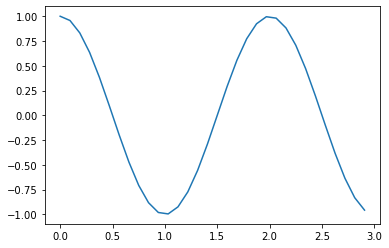

In [97]:
plt.plot(t_values, x_exact)

In [98]:
B = (h/2*A-np.eye(2))
B_inv = np.linalg.inv(B)

In [104]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [105]:
A

array([[ 0.       , -9.8696044],
       [ 1.       ,  0.       ]])

In [110]:
u_start = np.array([0,1])
# u_dot_start = 0
u = [u_start]
u_dot = [np.matmul(A,u[-1])]
t_time = [0]

steps = int( T/h)
for j in range(steps):
    # trapizoid
    
    u_plus_1 = np.matmul(B_inv, (-u[-1]-h/2*u_dot[-1]))
    u.append(u_plus_1)
    u_dot_new = np.matmul(A,u[-1])
    u_dot.append(u_dot_new)
    t_time.append(t_time[-1]+h)
    

In [113]:
us = np.array(u)
t_time = np.array(t_time)

In [114]:
us.shape

(33, 2)

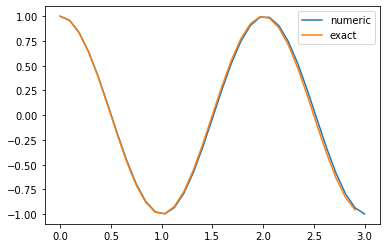

In [117]:
plt.plot(t_time,us[:,1], label = 'numeric')
plt.plot(t_values, x_exact,label= 'exact')
plt.legend()